In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.font_manager as fm
from matplotlib import rc

font_name = fm.FontProperties(fname="c:\\windows\\fonts\\malgun.ttf").get_name()
rc('font', family=font_name)

In [20]:
pop_age = pd.read_csv('연령_및_성별_인구__시군구_20201208151612.csv', encoding='euc-kr')
pop_age.head()

,행정구역별(시군구),15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,15세미만,65세이상
0,서울특별시,516892,673957,720334,772614,773379,764037,809914,734368,763943,598732,1112804,1229365
1,부산광역시,192942,237733,204407,216764,248134,250986,281834,277088,314199,253414,394222,522593
2,대구광역시,157226,174130,143280,150002,176247,196854,223499,208701,205773,153802,317483,323513
3,인천광역시,170796,194664,184813,203756,232443,236486,256690,246810,240439,160142,397220,316892
4,광주광역시,107517,114951,88844,99729,115222,124493,132463,116006,110190,74989,218936,174516


In [8]:
pop_tot = pd.read_csv('행정구역_시군구_별__성별_인구수_20201208145116.csv', encoding='euc-kr')
pop_tot.head()

,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,서울특별시,9930616,4876789,5053827
1,부산광역시,3498529,1725607,1772922
2,대구광역시,2484557,1234169,1250388
3,인천광역시,2943069,1477671,1465398
4,광주광역시,1469214,728137,741077


In [14]:
pop_tot.columns = ['행정구역별(시군구)', '총인구수 (명)', '남자인구수 (명)', '여자인구수 (명)']
pop_tot.columns

Index(['행정구역별(시군구)', '총인구수 (명)', '남자인구수 (명)', '여자인구수 (명)'], dtype='object')

In [21]:
pop = pd.merge(pop_tot, pop_age, on='행정구역별(시군구)')
pop

,행정구역별(시군구),총인구수 (명),남자인구수 (명),여자인구수 (명),15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,15세미만,65세이상
0,서울특별시,9930616,4876789,5053827,516892,673957,720334,772614,773379,764037,809914,734368,763943,598732,1112804,1229365
1,부산광역시,3498529,1725607,1772922,192942,237733,204407,216764,248134,250986,281834,277088,314199,253414,394222,522593
2,대구광역시,2484557,1234169,1250388,157226,174130,143280,150002,176247,196854,223499,208701,205773,153802,317483,323513
3,인천광역시,2943069,1477671,1465398,170796,194664,184813,203756,232443,236486,256690,246810,240439,160142,397220,316892
4,광주광역시,1469214,728137,741077,107517,114951,88844,99729,115222,124493,132463,116006,110190,74989,218936,174516
5,대전광역시,1514370,757289,757081,106199,125729,101112,103764,115923,123095,134867,117174,118164,83973,215110,170648
6,울산광역시,1172304,603797,568507,72705,75870,71351,81222,93186,93265,108245,103171,97004,64918,170027,106277
7,세종특별자치시,243048,121505,121543,13955,16686,13914,19155,24347,22851,18501,13951,13517,10079,47856,22860
8,경기도,12716780,6395453,6321327,768556,813226,756646,863963,1019400,1076513,1132327,1003764,940329,639097,1843782,1341654
9,강원도,1550806,781146,769660,93835,105907,78496,81620,96444,110354,124660,122535,137941,105785,187142,257668


In [25]:
theater = pd.read_csv('theater_dataset.csv', encoding='utf-8')

seats = theater.copy()
for i in range(len(seats)):
    seats.n_seats2[i] = seats.n_seats2[i].replace(',','')
    seats.n_seats2[i] = int(seats.n_seats2[i])

seats.pivot_table(index='city', values='n_seats2', aggfunc='sum').T

C:\Users\Junmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Junmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


city,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
n_seats2,60671,271105,40517,38566,17281,37242,19752,52572,382960,3974,10565,16828,26496,34798,12444,27310,20399


In [76]:
reserve = theater.pivot_table(index='city',values='total_reserved', aggfunc='mean').sort_values(by='total_reserved', ascending=False)
reserve = reserve.reset_index()
reserve.city

0     서울
1     광주
2     대구
3     대전
4     부산
5     인천
6     경기
7     울산
8     경북
9     세종
10    충남
11    전북
12    경남
13    전남
14    강원
15    충북
16    제주
Name: city, dtype: object

In [77]:
reserve.city = ['seoul','gwangju','daegu','daejeoun','busan','incheon','gyungki','ulsan','kyungbuk','sejong','chungnam',
                'jeonbuk','kyungnam','jeonnam','kangwon','chungbuk','jeju']
reserve.head()

,city,total_reserved
0,seoul,13323.617931
1,gwangju,5494.320000
2,daegu,5162.065217
3,daejeoun,4330.218182
4,busan,4071.672897


In [25]:
seats = seats.pivot_table(index='city', values='n_seats2', aggfunc='sum')
seats.head()

,n_seats2
city,
강원,60671
경기,271105
경남,40517
경북,38566
광주,17281


In [38]:
seats = seats.reset_index()

In [28]:
count = pd.DataFrame(theater.city.value_counts())
count.head()

,city
서울,725
경기,235
부산,107
대구,92
경남,89


In [39]:
count = count.reset_index()
count.columns = ['city','count']

In [41]:
theater1 = pd.merge(seats, count, on='city')

In [42]:
theater1.head()

,city,n_seats2,count
0,강원,60671,75
1,경기,271105,235
2,경남,40517,89
3,경북,38566,70
4,광주,17281,50


In [24]:
pop['행정구역별(시군구)'] = ['서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남',
                    '전북','전남','경북','경남','제주']
pop.head()

,행정구역별(시군구),총인구수 (명),남자인구수 (명),여자인구수 (명),15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,15세미만,65세이상
0,서울,9930616,4876789,5053827,516892,673957,720334,772614,773379,764037,809914,734368,763943,598732,1112804,1229365
1,부산,3498529,1725607,1772922,192942,237733,204407,216764,248134,250986,281834,277088,314199,253414,394222,522593
2,대구,2484557,1234169,1250388,157226,174130,143280,150002,176247,196854,223499,208701,205773,153802,317483,323513
3,인천,2943069,1477671,1465398,170796,194664,184813,203756,232443,236486,256690,246810,240439,160142,397220,316892
4,광주,1469214,728137,741077,107517,114951,88844,99729,115222,124493,132463,116006,110190,74989,218936,174516


In [44]:
pop.columns = ['city', 'total', 'male', 'female', '15~19', '20~24',
       '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', '55~59',
       '60~64', 'under 15', 'over 65']
pop.head()

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,45~49,50~54,55~59,60~64,under 15,over 65
0,서울,9930616,4876789,5053827,516892,673957,720334,772614,773379,764037,809914,734368,763943,598732,1112804,1229365
1,부산,3498529,1725607,1772922,192942,237733,204407,216764,248134,250986,281834,277088,314199,253414,394222,522593
2,대구,2484557,1234169,1250388,157226,174130,143280,150002,176247,196854,223499,208701,205773,153802,317483,323513
3,인천,2943069,1477671,1465398,170796,194664,184813,203756,232443,236486,256690,246810,240439,160142,397220,316892
4,광주,1469214,728137,741077,107517,114951,88844,99729,115222,124493,132463,116006,110190,74989,218936,174516


In [46]:
final = pd.merge(pop, theater1, on='city')
final.head()

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,45~49,50~54,55~59,60~64,under 15,over 65,n_seats2,count
0,서울,9930616,4876789,5053827,516892,673957,720334,772614,773379,764037,809914,734368,763943,598732,1112804,1229365,382960,725
1,부산,3498529,1725607,1772922,192942,237733,204407,216764,248134,250986,281834,277088,314199,253414,394222,522593,52572,107
2,대구,2484557,1234169,1250388,157226,174130,143280,150002,176247,196854,223499,208701,205773,153802,317483,323513,37242,92
3,인천,2943069,1477671,1465398,170796,194664,184813,203756,232443,236486,256690,246810,240439,160142,397220,316892,16828,49
4,광주,1469214,728137,741077,107517,114951,88844,99729,115222,124493,132463,116006,110190,74989,218936,174516,17281,50


In [47]:
final['seats/pop'] = final['n_seats2']/final['total']
final.head()

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,45~49,50~54,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop
0,서울,9930616,4876789,5053827,516892,673957,720334,772614,773379,764037,809914,734368,763943,598732,1112804,1229365,382960,725,0.038564
1,부산,3498529,1725607,1772922,192942,237733,204407,216764,248134,250986,281834,277088,314199,253414,394222,522593,52572,107,0.015027
2,대구,2484557,1234169,1250388,157226,174130,143280,150002,176247,196854,223499,208701,205773,153802,317483,323513,37242,92,0.014989
3,인천,2943069,1477671,1465398,170796,194664,184813,203756,232443,236486,256690,246810,240439,160142,397220,316892,16828,49,0.005718
4,광주,1469214,728137,741077,107517,114951,88844,99729,115222,124493,132463,116006,110190,74989,218936,174516,17281,50,0.011762


In [51]:
final['count/pop'] = final['count']/final['total']*1000
final.head()

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,45~49,50~54,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop,count/pop
0,서울,9930616,4876789,5053827,516892,673957,720334,772614,773379,764037,809914,734368,763943,598732,1112804,1229365,382960,725,0.038564,0.073007
1,부산,3498529,1725607,1772922,192942,237733,204407,216764,248134,250986,281834,277088,314199,253414,394222,522593,52572,107,0.015027,0.030584
2,대구,2484557,1234169,1250388,157226,174130,143280,150002,176247,196854,223499,208701,205773,153802,317483,323513,37242,92,0.014989,0.037029
3,인천,2943069,1477671,1465398,170796,194664,184813,203756,232443,236486,256690,246810,240439,160142,397220,316892,16828,49,0.005718,0.016649
4,광주,1469214,728137,741077,107517,114951,88844,99729,115222,124493,132463,116006,110190,74989,218936,174516,17281,50,0.011762,0.034032


In [53]:
final.city = ['seoul','busan','daegu','incheon','gwangju','daejeoun','ulsan','sejong','gyungki','kangwon','chungbuk','chungnam',
             'jeonbuk','jeonnam','kyungbuk','kyungnam','jeju']

In [79]:
final1 = pd.merge(final, reserve, on='city')
final1.head()

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,...,50~54,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop,count/pop,total_reserved
0,seoul,9930616,4876789,5053827,516892,673957,720334,772614,773379,764037,...,734368,763943,598732,1112804,1229365,382960,725,0.038564,0.073007,13323.617931
1,busan,3498529,1725607,1772922,192942,237733,204407,216764,248134,250986,...,277088,314199,253414,394222,522593,52572,107,0.015027,0.030584,4071.672897
2,daegu,2484557,1234169,1250388,157226,174130,143280,150002,176247,196854,...,208701,205773,153802,317483,323513,37242,92,0.014989,0.037029,5162.065217
3,incheon,2943069,1477671,1465398,170796,194664,184813,203756,232443,236486,...,246810,240439,160142,397220,316892,16828,49,0.005718,0.016649,3757.204082
4,gwangju,1469214,728137,741077,107517,114951,88844,99729,115222,124493,...,116006,110190,74989,218936,174516,17281,50,0.011762,0.034032,5494.320000


In [83]:
final1['reserve/pop'] = final1['total_reserved']/final1['total']*10
final1.head()

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,...,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop,count/pop,total_reserved,reserve/pop
0,seoul,9930616,4876789,5053827,516892,673957,720334,772614,773379,764037,...,763943,598732,1112804,1229365,382960,725,0.038564,0.073007,13323.617931,0.013417
1,busan,3498529,1725607,1772922,192942,237733,204407,216764,248134,250986,...,314199,253414,394222,522593,52572,107,0.015027,0.030584,4071.672897,0.011638
2,daegu,2484557,1234169,1250388,157226,174130,143280,150002,176247,196854,...,205773,153802,317483,323513,37242,92,0.014989,0.037029,5162.065217,0.020777
3,incheon,2943069,1477671,1465398,170796,194664,184813,203756,232443,236486,...,240439,160142,397220,316892,16828,49,0.005718,0.016649,3757.204082,0.012766
4,gwangju,1469214,728137,741077,107517,114951,88844,99729,115222,124493,...,110190,74989,218936,174516,17281,50,0.011762,0.034032,5494.320000,0.037396


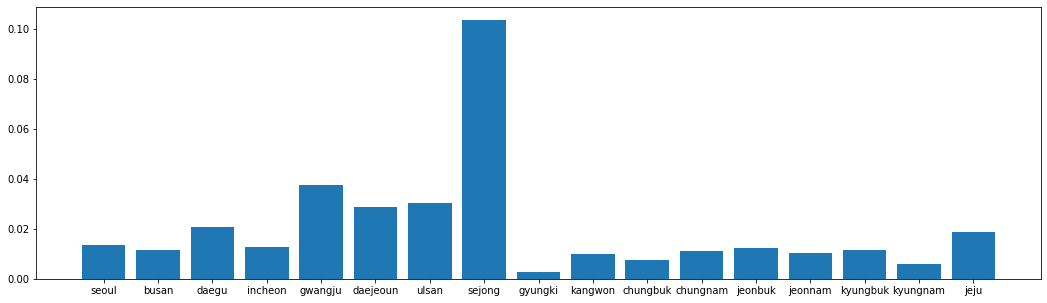

In [84]:
plt.figure(figsize = (18,5))
plt.bar(x = final1.city, height = final1['reserve/pop'])
plt.show()

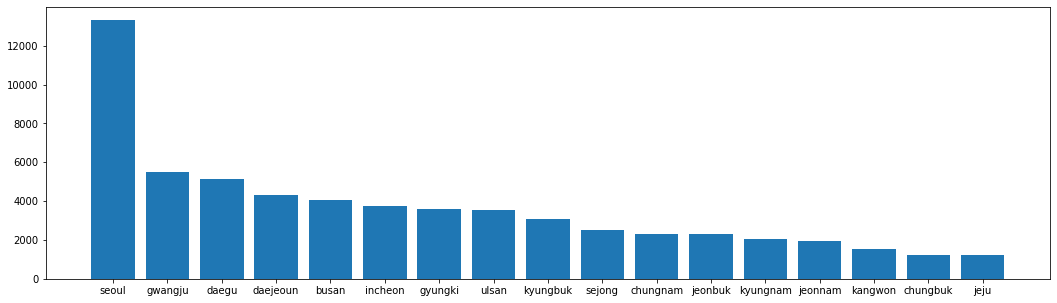

In [78]:
plt.figure(figsize = (18,5))
plt.bar(x = reserve.city, height = reserve['total_reserved'])
plt.show()

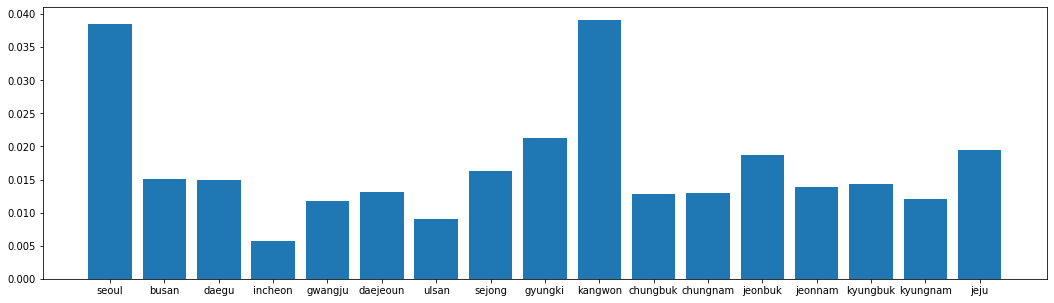

In [55]:
plt.figure(figsize = (18,5))
plt.bar(x = final.city, height = final['seats/pop'])
plt.show()

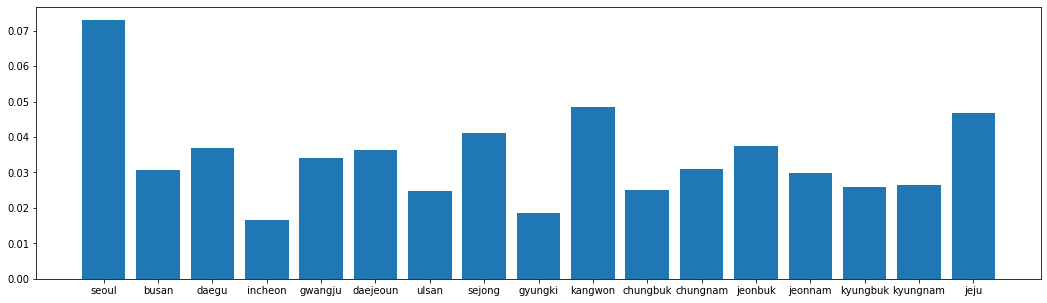

In [56]:
plt.figure(figsize = (18,5))
plt.bar(x = final.city, height = final['count/pop'])
plt.show()

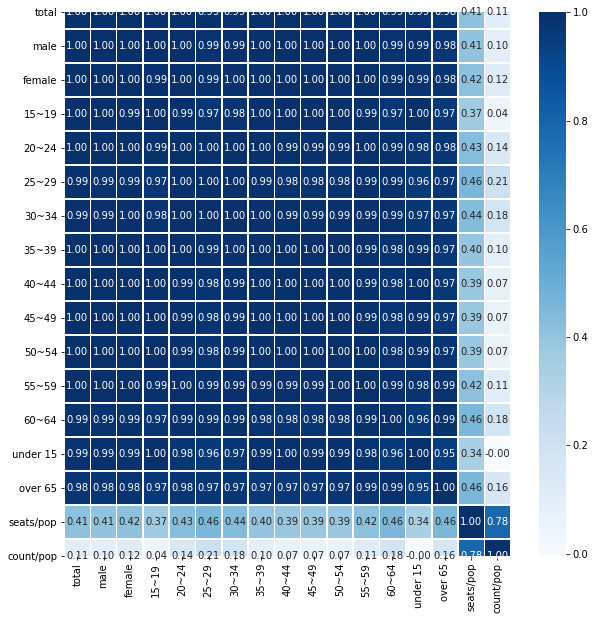

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(data = final.drop(['n_seats2','count'], axis=1).corr(), annot=True, fmt=".2f", linewidths=.5, cmap="Blues")

In [63]:
x = final.drop(['seats/pop','count/pop','n_seats2','count','city'], axis=1)
y_1 = final['seats/pop']
y_2 = final['count/pop']

from sklearn.linear_model import LinearRegression

linreg1 = LinearRegression()

linreg1.fit(x, y_1)

print("Training R^2: %.2f" % linreg1.score(x, y_1))

Training R^2: 0.98


In [67]:
print("intercept:", linreg1.intercept_)
beta = pd.DataFrame(linreg1.coef_, index=x.columns, columns=['slope'])
beta.sort_values('slope')

intercept: 0.026176424022789604


,slope
50~54,-2.024844e-06
under 15,-1.317979e-06
20~24,-1.244385e-06
45~49,-9.611307e-07
30~34,-7.421263e-07
60~64,-5.483523e-07
female,-4.886119e-07
35~39,-3.899888e-07
over 65,-7.117008e-08
total,3.446810e-08


In [64]:
linreg2 = LinearRegression()

linreg2.fit(x, y_2)

print("Training R^2: %.2f" % linreg2.score(x, y_2))

Training R^2: 0.98


In [68]:
print("intercept:", linreg2.intercept_)
beta = pd.DataFrame(linreg2.coef_, index=x.columns, columns=['slope'])
beta.sort_values('slope')

intercept: 0.05182353068279749


,slope
50~54,-2.240780e-06
30~34,-1.703246e-06
20~24,-1.542669e-06
under 15,-8.911703e-07
female,-3.126112e-07
60~64,-2.836763e-07
total,-5.501593e-08
over 65,2.060419e-07
male,2.575953e-07
45~49,4.263882e-07


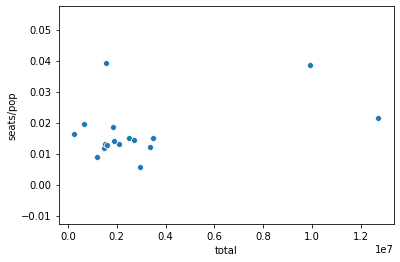

In [65]:
sns.scatterplot(x='total',y='seats/pop', data=final)

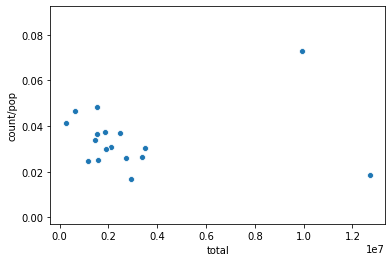

In [66]:
sns.scatterplot(x='total',y='count/pop', data=final)

In [89]:
final.head()

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,45~49,50~54,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop,count/pop
0,seoul,9930616,4876789,5053827,516892,673957,720334,772614,773379,764037,809914,734368,763943,598732,1112804,1229365,382960,725,0.038564,0.073007
1,busan,3498529,1725607,1772922,192942,237733,204407,216764,248134,250986,281834,277088,314199,253414,394222,522593,52572,107,0.015027,0.030584
2,daegu,2484557,1234169,1250388,157226,174130,143280,150002,176247,196854,223499,208701,205773,153802,317483,323513,37242,92,0.014989,0.037029
3,incheon,2943069,1477671,1465398,170796,194664,184813,203756,232443,236486,256690,246810,240439,160142,397220,316892,16828,49,0.005718,0.016649
4,gwangju,1469214,728137,741077,107517,114951,88844,99729,115222,124493,132463,116006,110190,74989,218936,174516,17281,50,0.011762,0.034032


In [90]:
b = ['male', 'female', '15~19', '20~24', '25~29', '30~34',
    '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', 'under 15','over 65']

In [15]:
final.to_csv('individual.csv', encoding='euc-kr', index=False)

In [16]:
final1.to_csv('individual_ratio.csv', encoding='euc-kr', index=False)

In [17]:
final = pd.read_csv('individual.csv', encoding='euc-kr')
final.head()

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,45~49,50~54,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop,count/pop
0,seoul,9930616,4876789,5053827,516892,673957,720334,772614,773379,764037,809914,734368,763943,598732,1112804,1229365,382960,725,0.038564,0.073007
1,busan,3498529,1725607,1772922,192942,237733,204407,216764,248134,250986,281834,277088,314199,253414,394222,522593,52572,107,0.015027,0.030584
2,daegu,2484557,1234169,1250388,157226,174130,143280,150002,176247,196854,223499,208701,205773,153802,317483,323513,37242,92,0.014989,0.037029
3,incheon,2943069,1477671,1465398,170796,194664,184813,203756,232443,236486,256690,246810,240439,160142,397220,316892,16828,49,0.005718,0.016649
4,gwangju,1469214,728137,741077,107517,114951,88844,99729,115222,124493,132463,116006,110190,74989,218936,174516,17281,50,0.011762,0.034032


In [19]:
final.sort_values(by='total', ascending=False)

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,45~49,50~54,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop,count/pop
8,gyungki,12716780,6395453,6321327,768556,813226,756646,863963,1019400,1076513,1132327,1003764,940329,639097,1843782,1341654,271105,235,0.021319,0.018480
0,seoul,9930616,4876789,5053827,516892,673957,720334,772614,773379,764037,809914,734368,763943,598732,1112804,1229365,382960,725,0.038564,0.073007
1,busan,3498529,1725607,1772922,192942,237733,204407,216764,248134,250986,281834,277088,314199,253414,394222,522593,52572,107,0.015027,0.030584
15,kyungnam,3373871,1699219,1674652,198603,195198,169649,207206,247969,262255,290360,267481,273780,201854,467601,465492,40517,89,0.012009,0.026379
3,incheon,2943069,1477671,1465398,170796,194664,184813,203756,232443,236486,256690,246810,240439,160142,397220,316892,16828,49,0.005718,0.016649
14,kyungbuk,2700398,1356868,1343530,156872,164667,135395,153786,175114,189542,213883,213705,228464,183407,328692,477936,38566,70,0.014282,0.025922
2,daegu,2484557,1234169,1250388,157226,174130,143280,150002,176247,196854,223499,208701,205773,153802,317483,323513,37242,92,0.014989,0.037029
11,chungnam,2096727,1064765,1031962,132137,139392,114044,134323,152285,155285,165861,151996,159233,121018,290688,338771,27310,65,0.013025,0.031001
13,jeonnam,1903914,951889,952025,107285,95427,76435,93402,110555,123211,142563,141081,149821,113563,230630,375414,26496,57,0.013917,0.029938
12,jeonbuk,1864791,927505,937286,120269,123315,91187,98994,117433,134006,147359,139518,146522,113955,237909,331152,34798,70,0.018661,0.037538


In [8]:
b = ['male', 'female', '15~19', '20~24', '25~29', '30~34',
     '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', 'under 15','over 65']

In [9]:
final1 = final.copy()

for i in b:
    final1[i] = final1[i]/final['total']
    
final1.head()

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,45~49,50~54,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop,count/pop
0,seoul,9930616,0.491086,0.508914,0.052050,0.067867,0.072537,0.077801,0.077878,0.076938,0.081557,0.073950,0.076928,0.060292,0.112058,0.123795,382960,725,0.038564,0.073007
1,busan,3498529,0.493238,0.506762,0.055149,0.067952,0.058427,0.061959,0.070925,0.071740,0.080558,0.079201,0.089809,0.072434,0.112682,0.149375,52572,107,0.015027,0.030584
2,daegu,2484557,0.496736,0.503264,0.063281,0.070085,0.057668,0.060374,0.070937,0.079231,0.089955,0.083999,0.082821,0.061903,0.127783,0.130210,37242,92,0.014989,0.037029
3,incheon,2943069,0.502085,0.497915,0.058033,0.066143,0.062796,0.069232,0.078980,0.080354,0.087218,0.083861,0.081697,0.054413,0.134968,0.107674,16828,49,0.005718,0.016649
4,gwangju,1469214,0.495596,0.504404,0.073180,0.078240,0.060470,0.067879,0.078424,0.084734,0.090159,0.078958,0.074999,0.051040,0.149016,0.118782,17281,50,0.011762,0.034032


In [37]:
final2 = final1.T
final2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
city,seoul,busan,daegu,incheon,gwangju,daejeoun,ulsan,sejong,gyungki,kangwon,chungbuk,chungnam,jeonbuk,jeonnam,kyungbuk,kyungnam,jeju
total,9930616,3498529,2484557,2943069,1469214,1514370,1172304,243048,12716780,1550806,1591625,2096727,1864791,1903914,2700398,3373871,641597
male,0.491086,0.493238,0.496736,0.502085,0.495596,0.500069,0.515052,0.499922,0.502914,0.503703,0.504667,0.507822,0.497377,0.499964,0.50247,0.503641,0.502722
female,0.508914,0.506762,0.503264,0.497915,0.504404,0.499931,0.484948,0.500078,0.497086,0.496297,0.495333,0.492178,0.502623,0.500036,0.49753,0.496359,0.497278
15~19,0.0520503,0.0551495,0.0632813,0.0580333,0.0731799,0.0701275,0.0620189,0.0574166,0.0604364,0.0605072,0.0642815,0.0630206,0.0644946,0.0563497,0.0580922,0.058865,0.0602045


In [42]:
final2.columns = final2.iloc[0,:]
final2.head()

city,seoul,busan,daegu,incheon,gwangju,daejeoun,ulsan,sejong,gyungki,kangwon,chungbuk,chungnam,jeonbuk,jeonnam,kyungbuk,kyungnam,jeju
city,seoul,busan,daegu,incheon,gwangju,daejeoun,ulsan,sejong,gyungki,kangwon,chungbuk,chungnam,jeonbuk,jeonnam,kyungbuk,kyungnam,jeju
total,9930616,3498529,2484557,2943069,1469214,1514370,1172304,243048,12716780,1550806,1591625,2096727,1864791,1903914,2700398,3373871,641597
male,0.491086,0.493238,0.496736,0.502085,0.495596,0.500069,0.515052,0.499922,0.502914,0.503703,0.504667,0.507822,0.497377,0.499964,0.50247,0.503641,0.502722
female,0.508914,0.506762,0.503264,0.497915,0.504404,0.499931,0.484948,0.500078,0.497086,0.496297,0.495333,0.492178,0.502623,0.500036,0.49753,0.496359,0.497278
15~19,0.0520503,0.0551495,0.0632813,0.0580333,0.0731799,0.0701275,0.0620189,0.0574166,0.0604364,0.0605072,0.0642815,0.0630206,0.0644946,0.0563497,0.0580922,0.058865,0.0602045


In [48]:
final2 = final2[4:16]

In [53]:
final2.index

Index(['15~19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54',
       '55~59', '60~64', 'under 15', 'over 65'],
      dtype='object')

In [55]:
final2 = final2.reindex(index=['under 15','15~19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54',
       '55~59', '60~64','over 65'])
final2.columns

Index(['seoul', 'busan', 'daegu', 'incheon', 'gwangju', 'daejeoun', 'ulsan',
       'sejong', 'gyungki', 'kangwon', 'chungbuk', 'chungnam', 'jeonbuk',
       'jeonnam', 'kyungbuk', 'kyungnam', 'jeju'],
      dtype='object', name='city')

In [56]:
city = ['seoul', 'busan', 'daegu', 'incheon', 'gwangju', 'daejeoun', 'ulsan',
       'sejong', 'gyungki', 'kangwon', 'chungbuk', 'chungnam', 'jeonbuk',
       'jeonnam', 'kyungbuk', 'kyungnam', 'jeju']

In [4]:
final3.columns

Index(['age', 'seoul', 'busan', 'daegu', 'incheon', 'gwangju', 'daejeoun',
       'ulsan', 'sejong', 'gyungki', 'kangwon', 'chungbuk', 'chungnam',
       'jeonbuk', 'jeonnam', 'kyungbuk', 'kyungnam', 'jeju'],
      dtype='object')

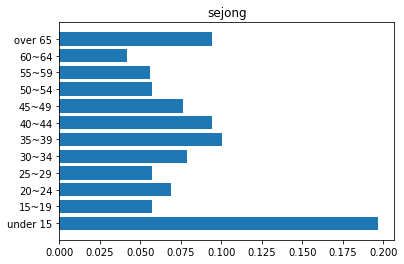

In [24]:
plt.barh(y=final3.age, width=final3.sejong)
plt.title('sejong')
plt.show()

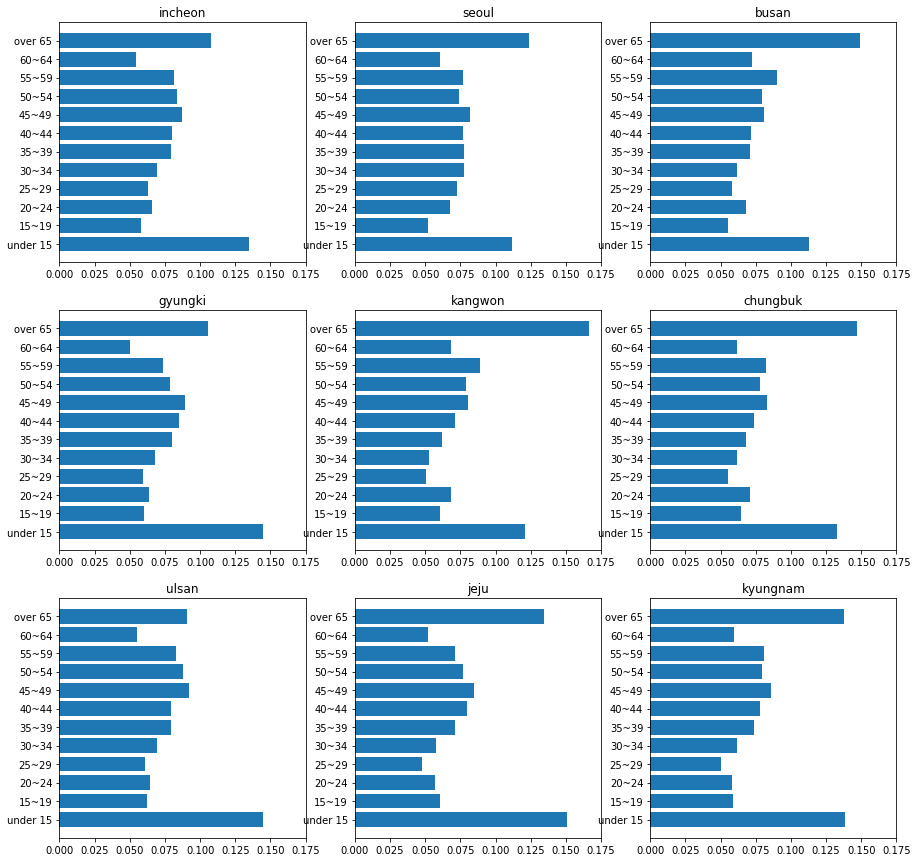

In [22]:
%matplotlib inline

plt.figure(figsize=(15,15))

plt.subplot(331)
plt.xlim(0,0.175)
plt.barh(y=final3.age, width=final3.incheon)
plt.title('incheon')

plt.subplot(332)
plt.xlim(0,0.175)
plt.barh(y=final3.age, width=final3.seoul)
plt.title('seoul')

plt.subplot(333)
plt.xlim(0,0.175)
plt.barh(y=final3.age, width=final3.busan)
plt.title('busan')

plt.subplot(334)
plt.xlim(0,0.175)
plt.barh(y=final3.age, width=final3.gyungki)
plt.title('gyungki')

plt.subplot(335)
plt.xlim(0,0.175)
plt.barh(y=final3.age, width=final3.kangwon)
plt.title('kangwon')

plt.subplot(336)
plt.xlim(0,0.175)
plt.barh(y=final3.age, width=final3.chungbuk)
plt.title('chungbuk')

plt.subplot(337)
plt.xlim(0,0.175)
plt.barh(y=final3.age, width=final3.ulsan)
plt.title('ulsan')

plt.subplot(338)
plt.xlim(0,0.175)
plt.barh(y=final3.age, width=final3.jeju)
plt.title('jeju')

plt.subplot(339)
plt.xlim(0,0.175)
plt.barh(y=final3.age, width=final3.kyungnam)
plt.title('kyungnam')

plt.show()

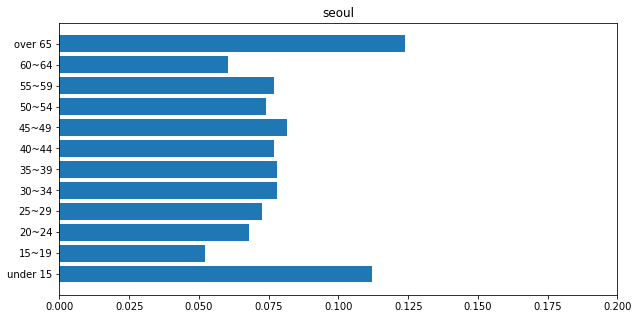

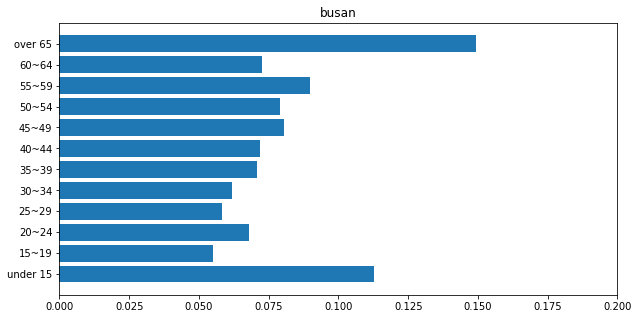

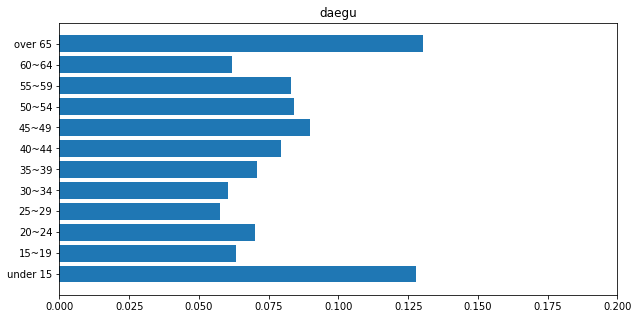

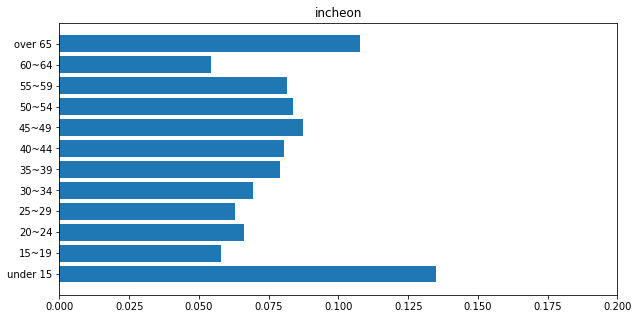

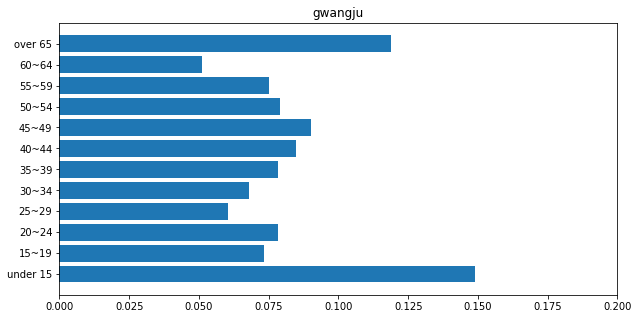

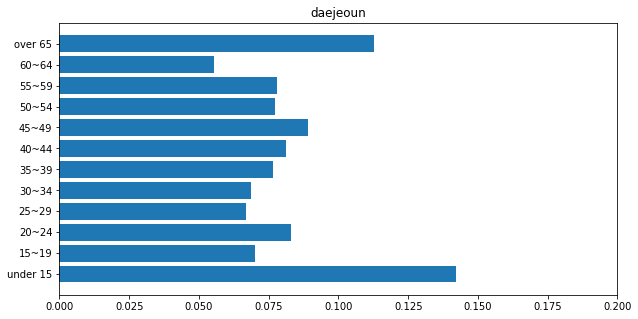

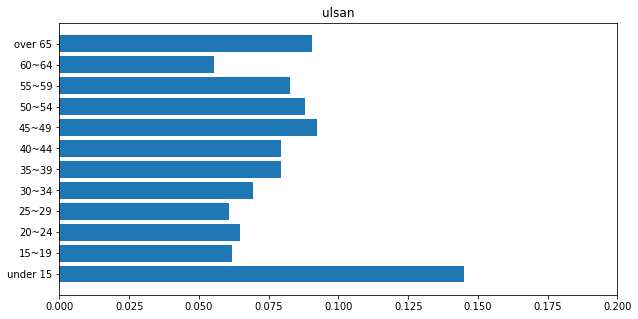

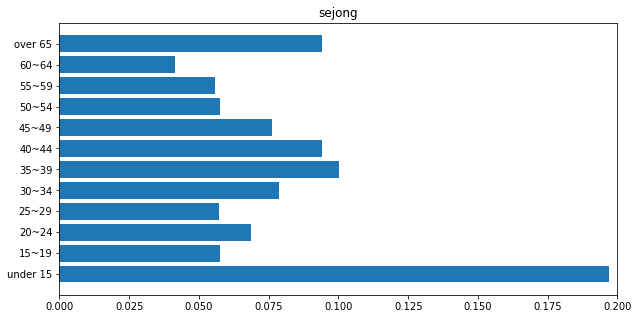

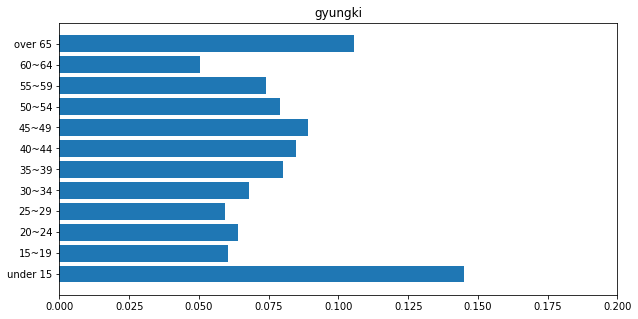

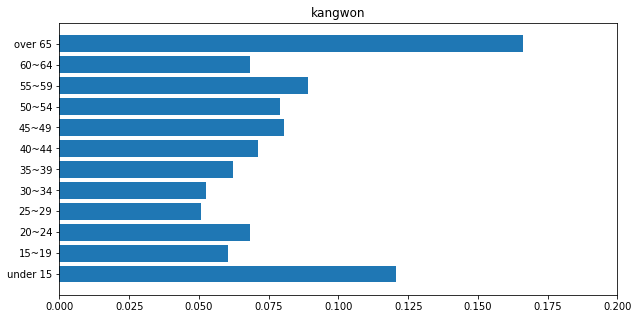

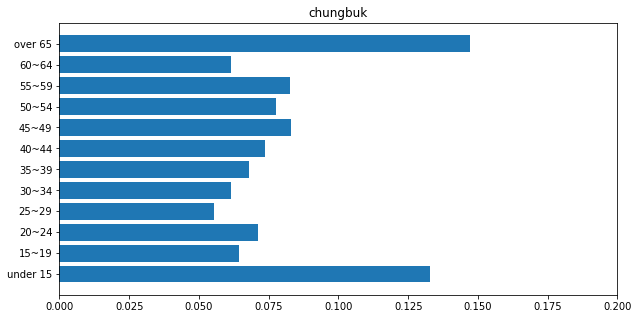

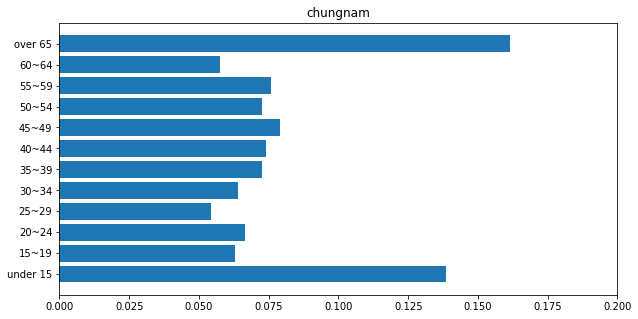

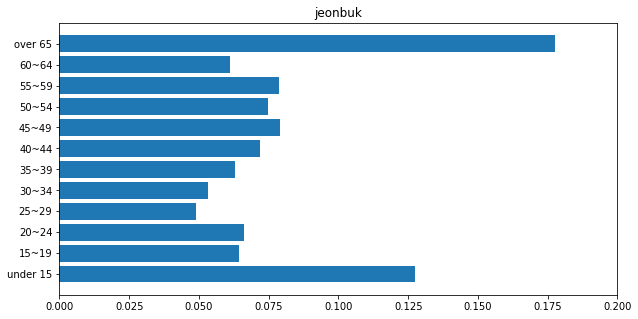

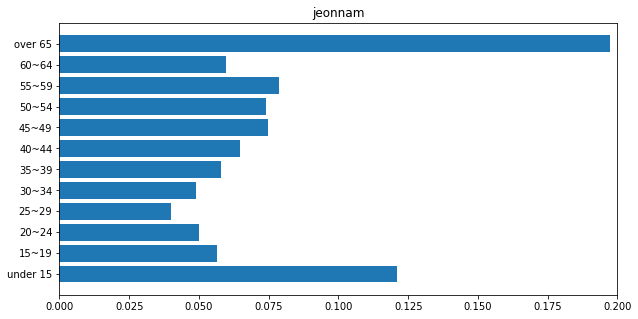

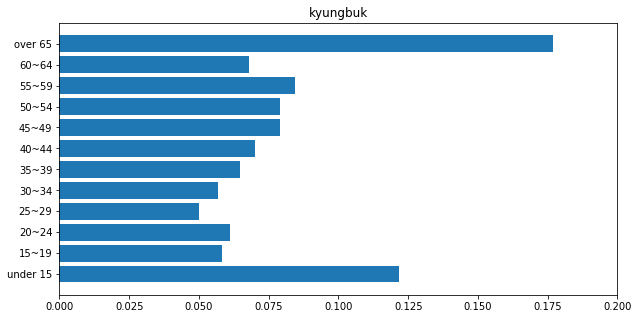

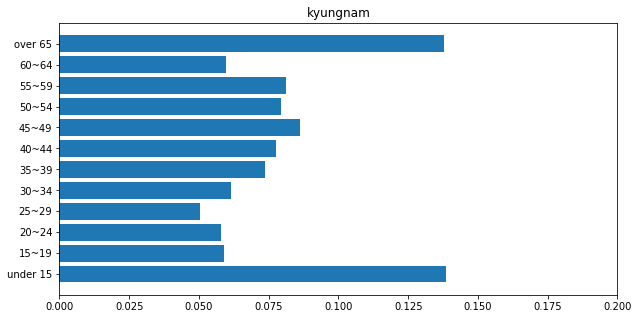

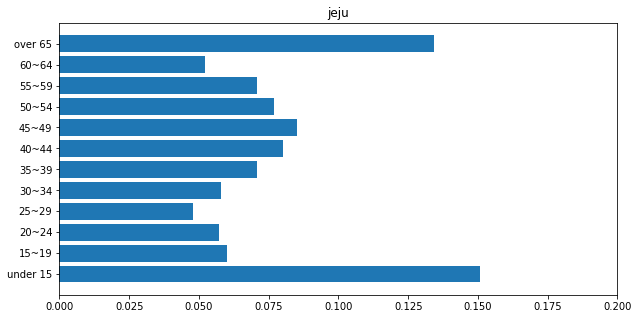

In [59]:
for x in city:
    plt.figure(figsize = (10,5))
    plt.xlim(0, 0.2)
    plt.barh(y = final2.index, width = x, data = final2, )
    plt.title(x)
    plt.show()

In [60]:
final2.to_csv('individual_trans.csv', encoding='euc-kr')

In [61]:
final3 = pd.read_csv('individual_trans.csv')
final3.head()

,Unnamed: 0,seoul,busan,daegu,incheon,gwangju,daejeoun,ulsan,sejong,gyungki,kangwon,chungbuk,chungnam,jeonbuk,jeonnam,kyungbuk,kyungnam,jeju
0,under 15,0.112058,0.112682,0.127783,0.134968,0.149016,0.142046,0.145037,0.196899,0.144988,0.120674,0.132967,0.138639,0.127579,0.121135,0.121720,0.138595,0.150566
1,15~19,0.052050,0.055149,0.063281,0.058033,0.073180,0.070128,0.062019,0.057417,0.060436,0.060507,0.064281,0.063021,0.064495,0.056350,0.058092,0.058865,0.060204
2,20~24,0.067867,0.067952,0.070085,0.066143,0.078240,0.083024,0.064719,0.068653,0.063949,0.068292,0.071115,0.066481,0.066128,0.050121,0.060979,0.057856,0.057034
3,25~29,0.072537,0.058427,0.057668,0.062796,0.060470,0.066768,0.060864,0.057248,0.059500,0.050616,0.055459,0.054391,0.048899,0.040146,0.050139,0.050283,0.047994
4,30~34,0.077801,0.061959,0.060374,0.069232,0.067879,0.068520,0.069284,0.078812,0.067939,0.052631,0.061640,0.064063,0.053086,0.049058,0.056949,0.061415,0.057966


In [64]:
final3.columns = ['age', 'seoul', 'busan', 'daegu', 'incheon', 'gwangju',
       'daejeoun', 'ulsan', 'sejong', 'gyungki', 'kangwon', 'chungbuk',
       'chungnam', 'jeonbuk', 'jeonnam', 'kyungbuk', 'kyungnam', 'jeju']

In [65]:
final3.to_csv('individual_trans.csv', encoding='euc-kr', index=False)

In [3]:
final3 = pd.read_csv('individual_trans.csv')
final3.head()

,age,seoul,busan,daegu,incheon,gwangju,daejeoun,ulsan,sejong,gyungki,kangwon,chungbuk,chungnam,jeonbuk,jeonnam,kyungbuk,kyungnam,jeju
0,under 15,0.112058,0.112682,0.127783,0.134968,0.149016,0.142046,0.145037,0.196899,0.144988,0.120674,0.132967,0.138639,0.127579,0.121135,0.121720,0.138595,0.150566
1,15~19,0.052050,0.055149,0.063281,0.058033,0.073180,0.070128,0.062019,0.057417,0.060436,0.060507,0.064281,0.063021,0.064495,0.056350,0.058092,0.058865,0.060204
2,20~24,0.067867,0.067952,0.070085,0.066143,0.078240,0.083024,0.064719,0.068653,0.063949,0.068292,0.071115,0.066481,0.066128,0.050121,0.060979,0.057856,0.057034
3,25~29,0.072537,0.058427,0.057668,0.062796,0.060470,0.066768,0.060864,0.057248,0.059500,0.050616,0.055459,0.054391,0.048899,0.040146,0.050139,0.050283,0.047994
4,30~34,0.077801,0.061959,0.060374,0.069232,0.067879,0.068520,0.069284,0.078812,0.067939,0.052631,0.061640,0.064063,0.053086,0.049058,0.056949,0.061415,0.057966


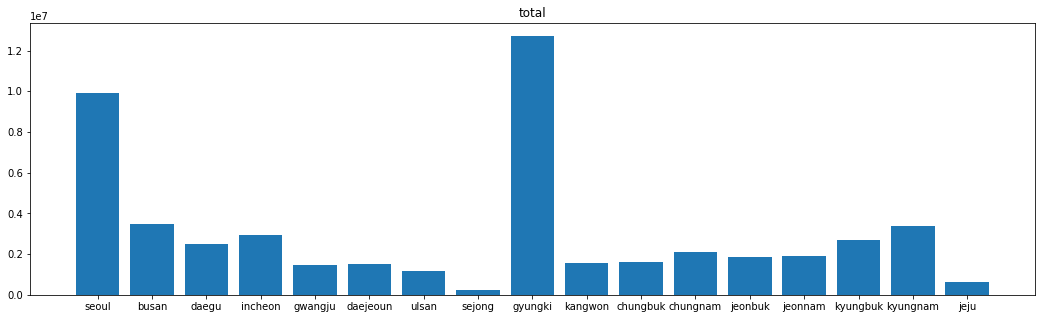

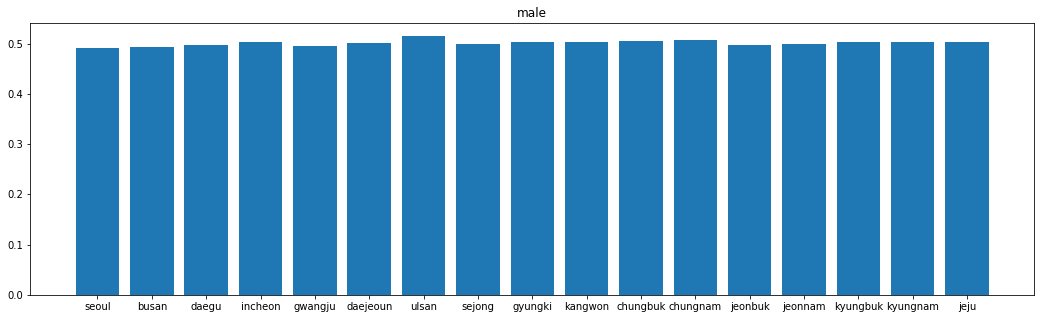

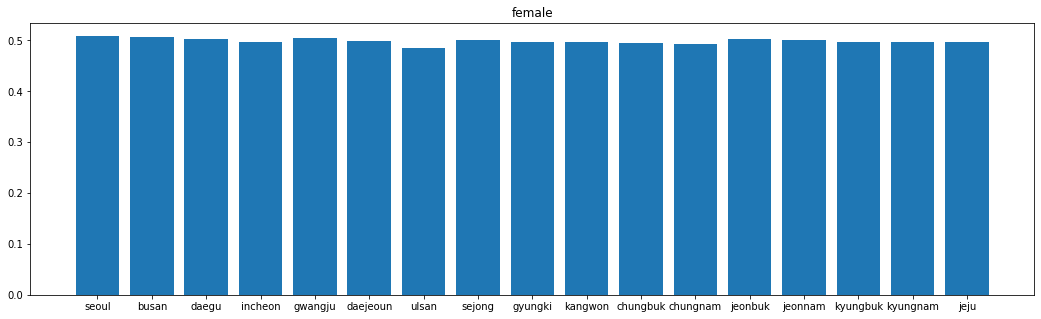

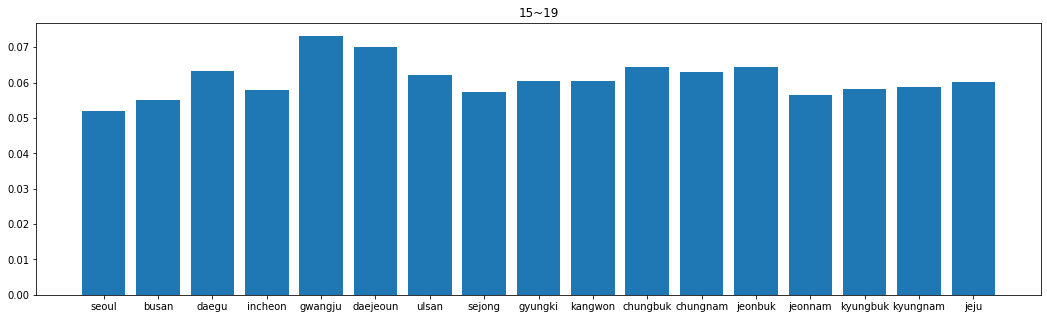

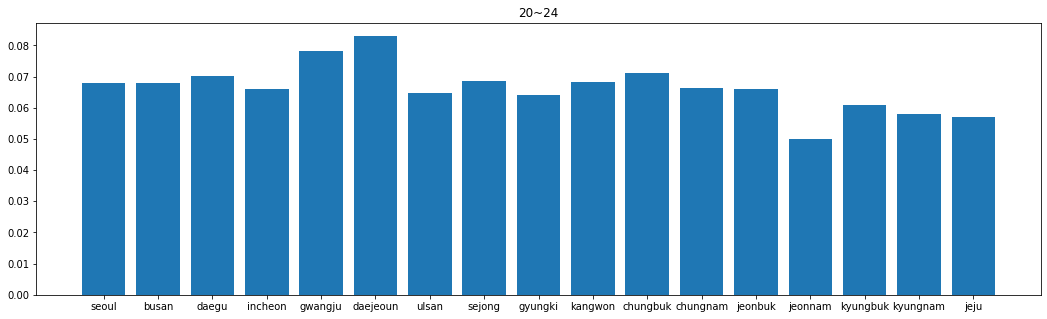

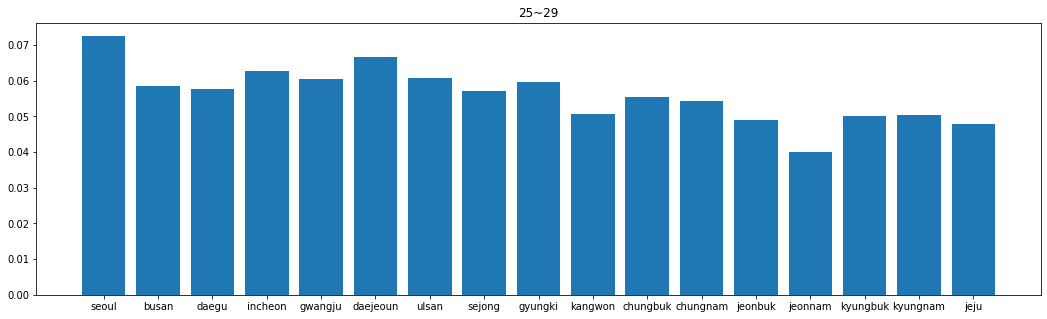

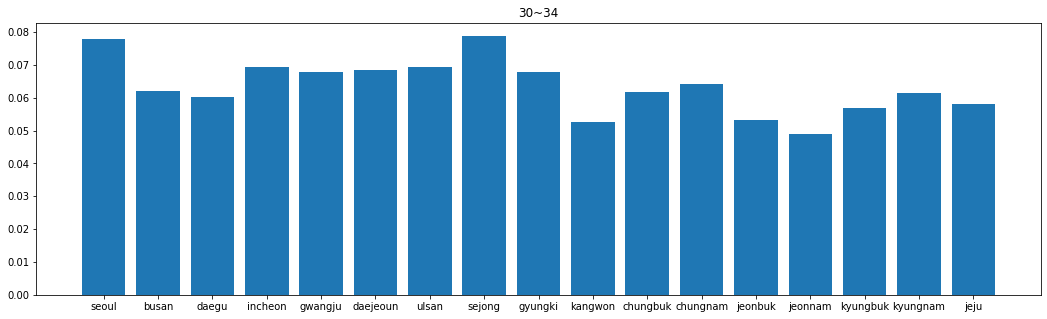

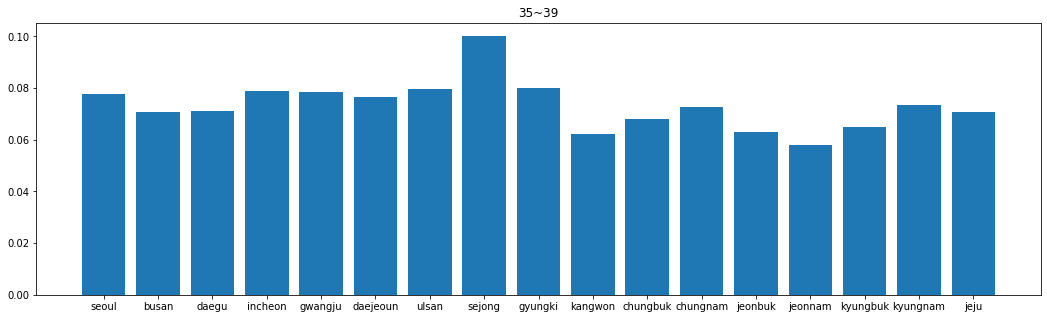

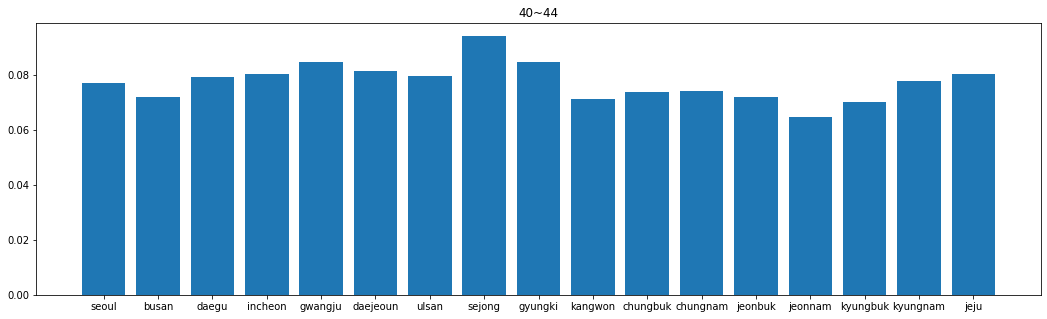

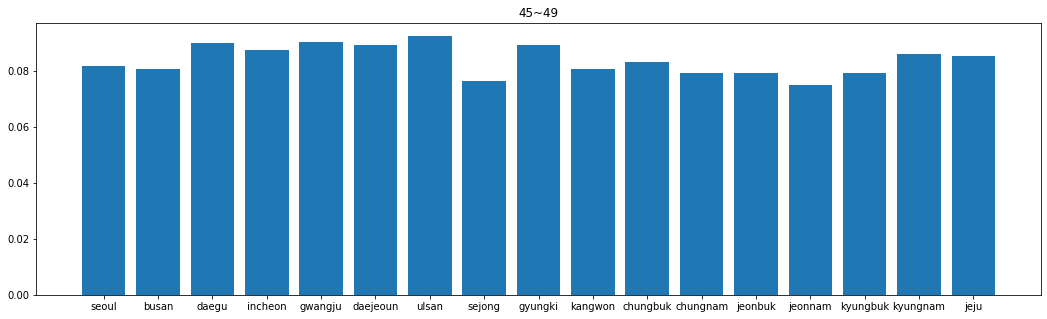

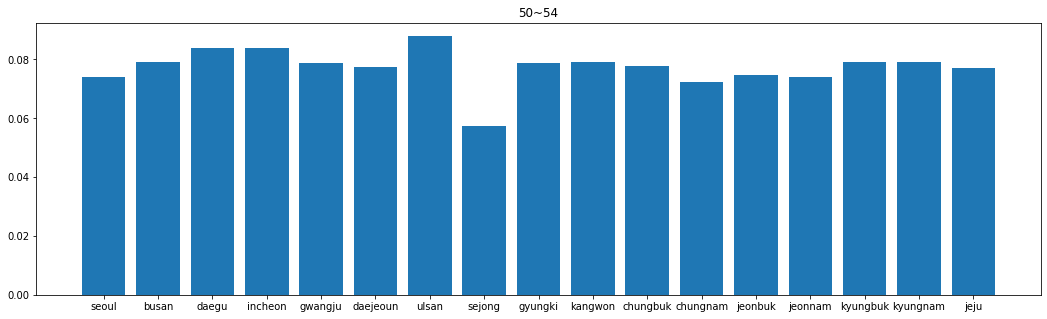

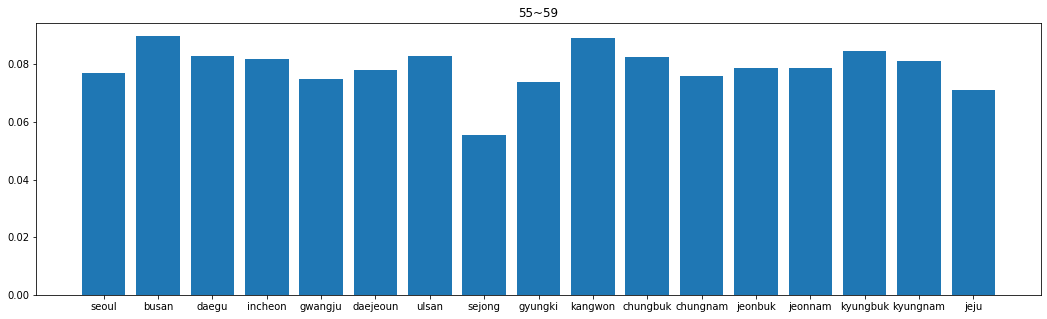

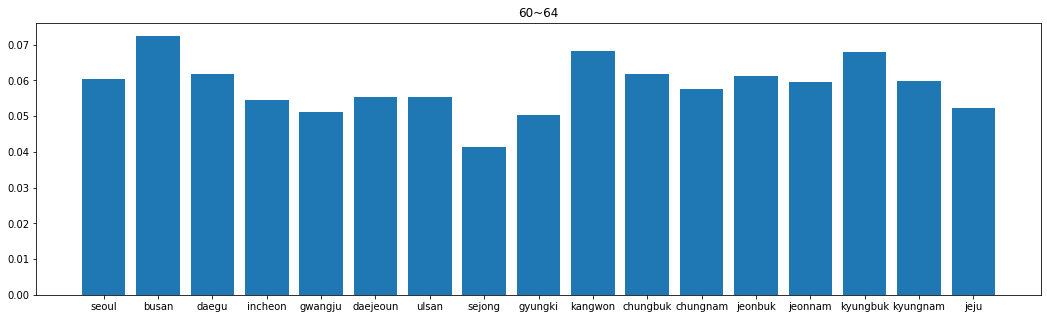

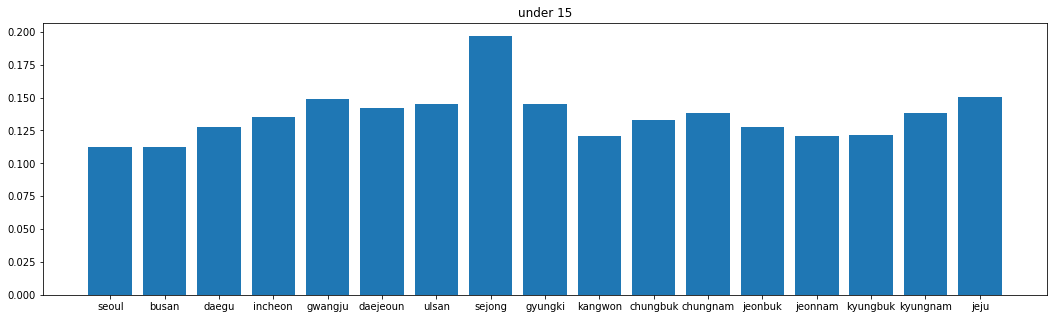

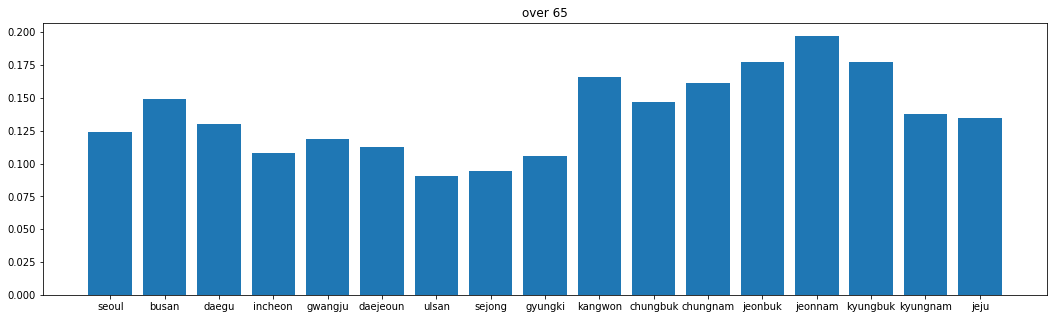

In [13]:
for j in a:
    plt.figure(figsize = (18,5))
    plt.bar(x = final1.city, height = j, data = final1)
    plt.title(j)
    plt.show()

In [17]:
final.columns

Index(['city', 'total', 'male', 'female', '15~19', '20~24', '25~29', '30~34',
       '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', 'under 15',
       'over 65', 'n_seats2', 'count', 'seats/pop', 'count/pop'],
      dtype='object')

In [7]:
a = ['total', 'male', 'female', '15~19', '20~24', '25~29', '30~34',
     '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', 'under 15','over 65']

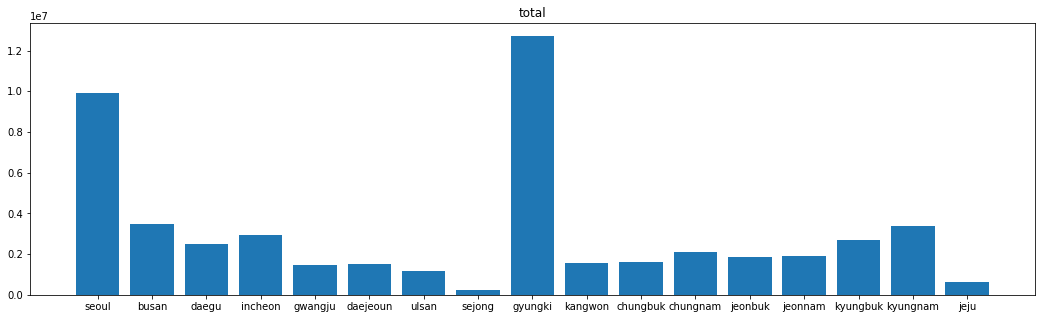

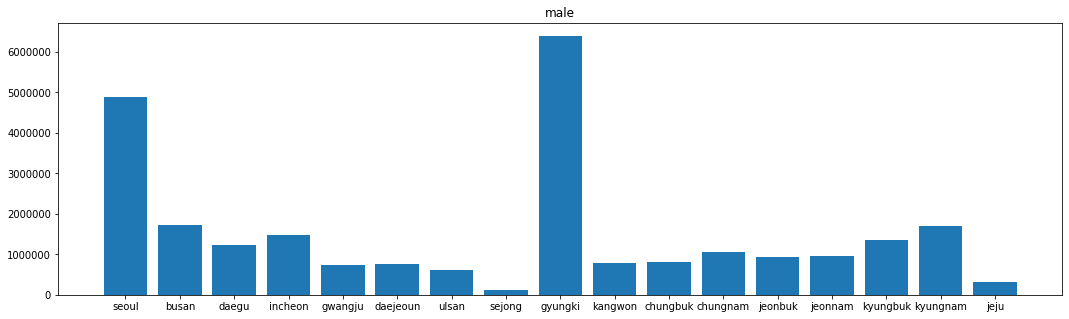

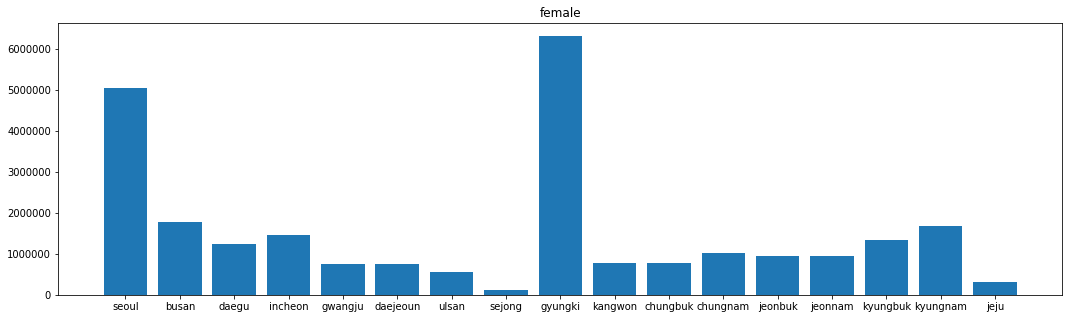

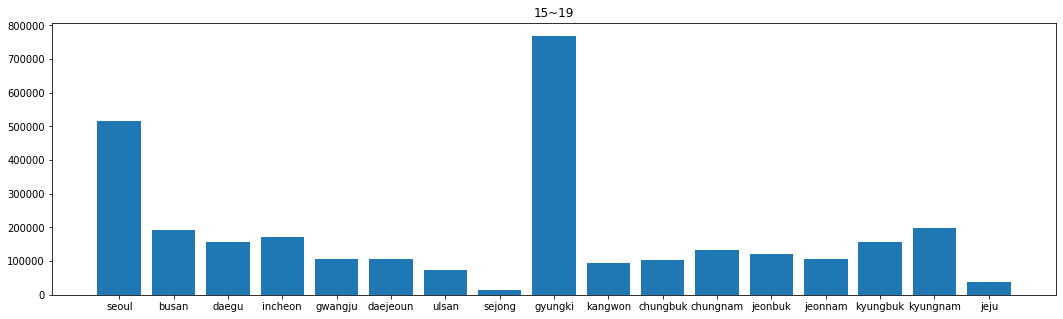

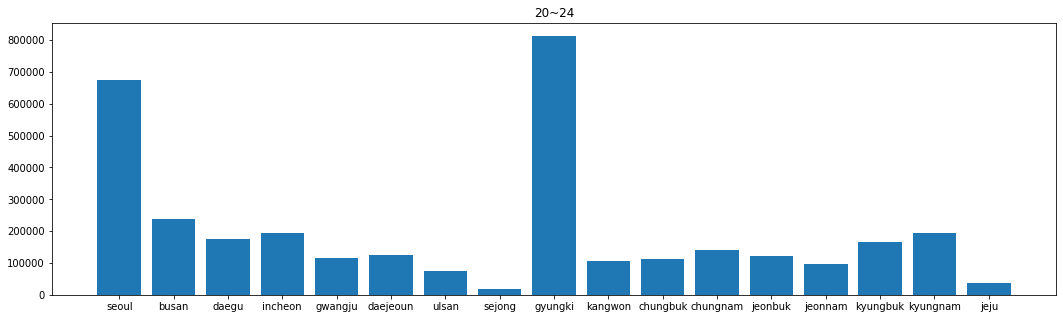

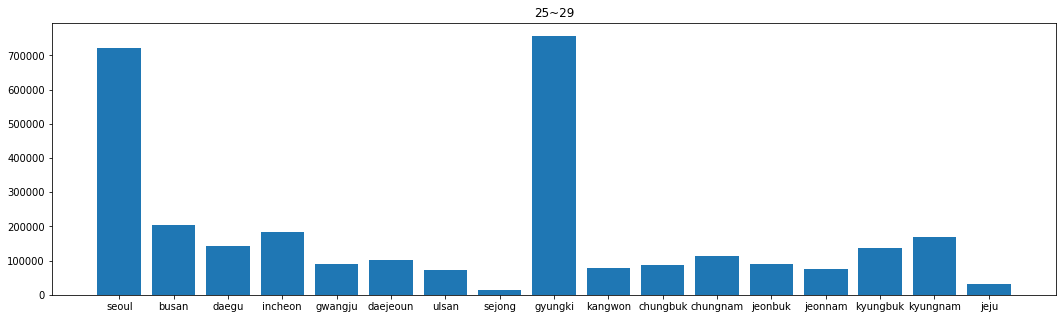

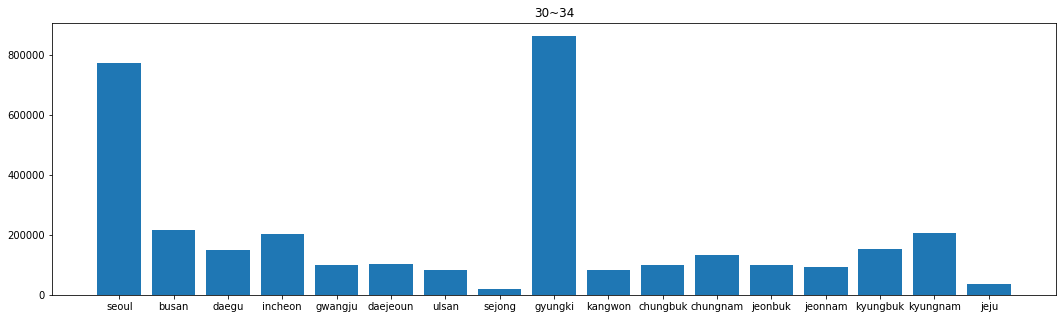

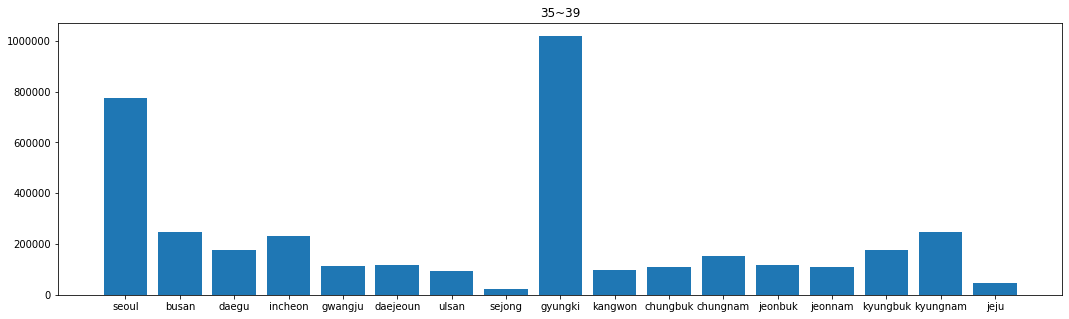

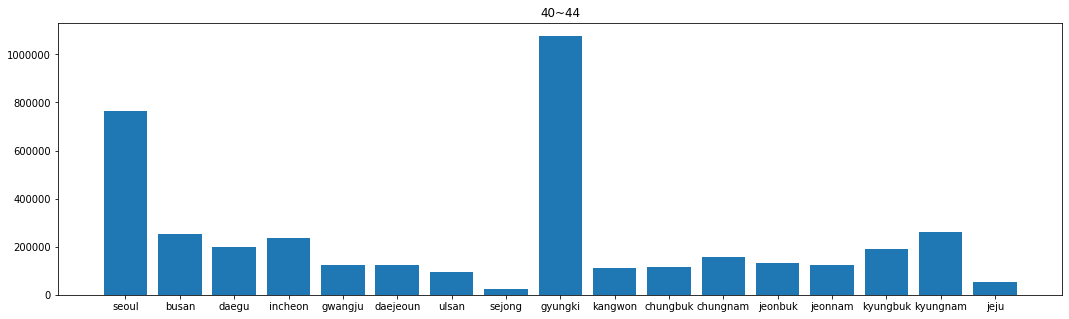

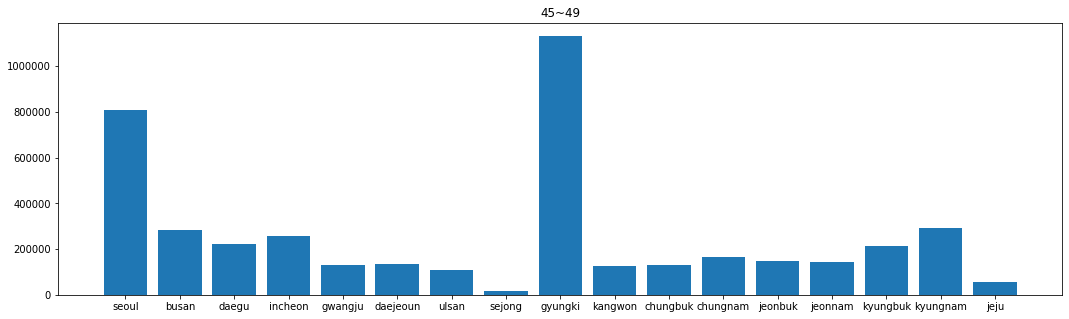

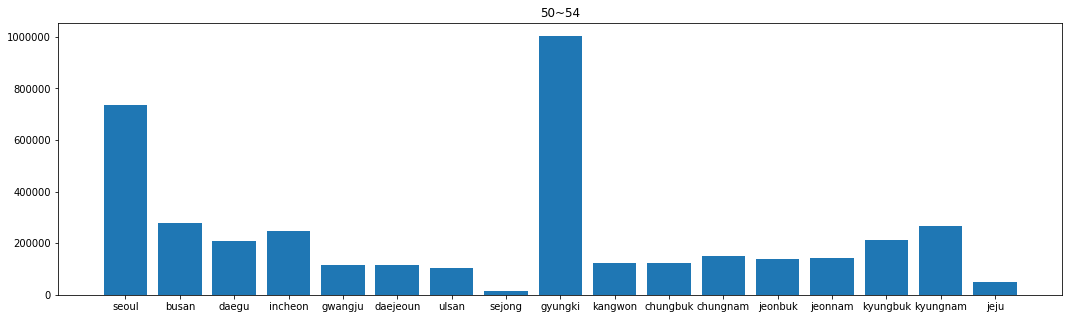

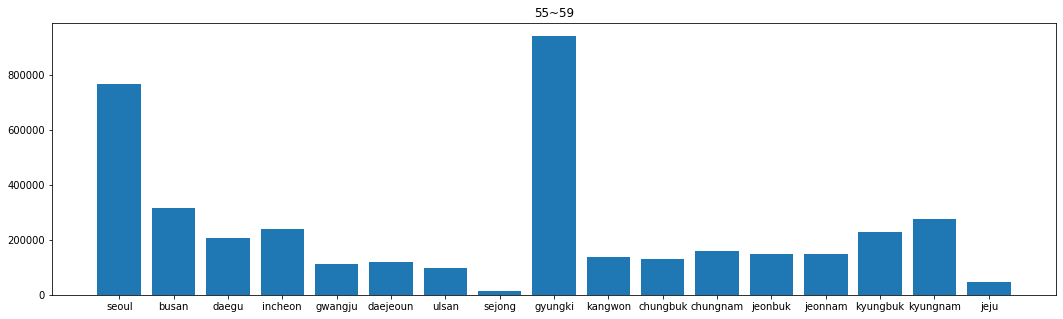

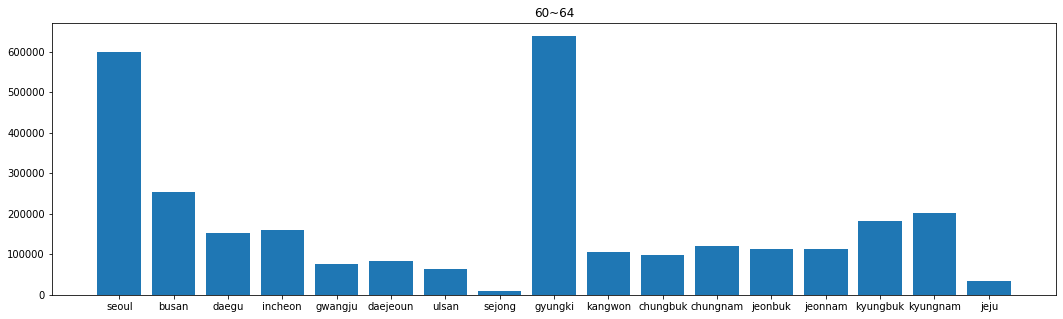

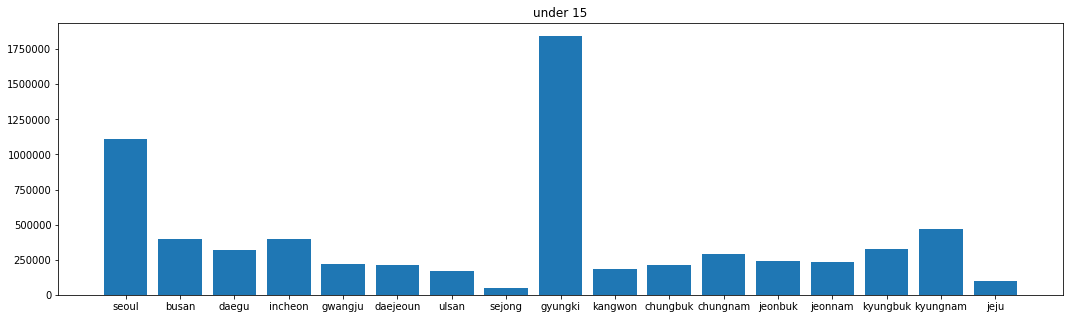

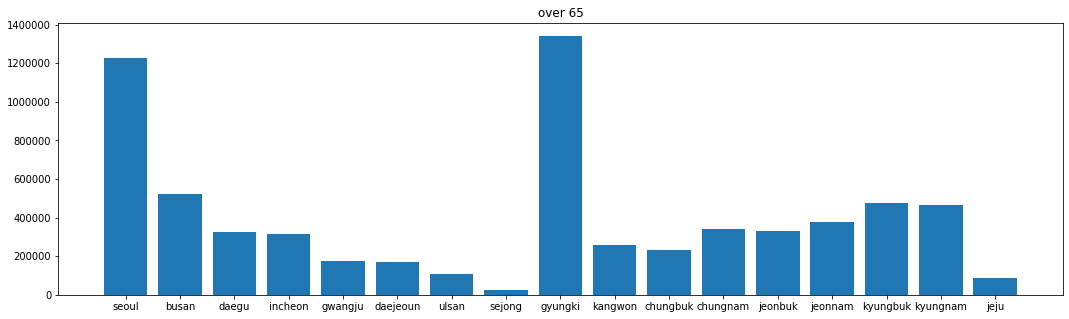

In [12]:
for i in a:
    plt.figure(figsize = (18,5))
    plt.bar(x = final.city, height = i, data = final)
    plt.title(i)
    plt.show()

In [36]:
final1.sort_values(by='20~24',ascending=False)

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,45~49,50~54,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop,count/pop
5,daejeoun,1514370,0.500069,0.499931,0.070128,0.083024,0.066768,0.068520,0.076549,0.081285,0.089058,0.077375,0.078028,0.055451,0.142046,0.112686,19752,55,0.013043,0.036319
4,gwangju,1469214,0.495596,0.504404,0.073180,0.078240,0.060470,0.067879,0.078424,0.084734,0.090159,0.078958,0.074999,0.051040,0.149016,0.118782,17281,50,0.011762,0.034032
10,chungbuk,1591625,0.504667,0.495333,0.064281,0.071115,0.055459,0.061640,0.068116,0.073648,0.082957,0.077783,0.082461,0.061660,0.132967,0.147102,20399,40,0.012816,0.025132
2,daegu,2484557,0.496736,0.503264,0.063281,0.070085,0.057668,0.060374,0.070937,0.079231,0.089955,0.083999,0.082821,0.061903,0.127783,0.130210,37242,92,0.014989,0.037029
7,sejong,243048,0.499922,0.500078,0.057417,0.068653,0.057248,0.078812,0.100174,0.094018,0.076121,0.057400,0.055615,0.041469,0.196899,0.094055,3974,10,0.016351,0.041144
9,kangwon,1550806,0.503703,0.496297,0.060507,0.068292,0.050616,0.052631,0.062190,0.071159,0.080384,0.079014,0.088948,0.068213,0.120674,0.166151,60671,75,0.039122,0.048362
1,busan,3498529,0.493238,0.506762,0.055149,0.067952,0.058427,0.061959,0.070925,0.071740,0.080558,0.079201,0.089809,0.072434,0.112682,0.149375,52572,107,0.015027,0.030584
0,seoul,9930616,0.491086,0.508914,0.052050,0.067867,0.072537,0.077801,0.077878,0.076938,0.081557,0.073950,0.076928,0.060292,0.112058,0.123795,382960,725,0.038564,0.073007
11,chungnam,2096727,0.507822,0.492178,0.063021,0.066481,0.054391,0.064063,0.072630,0.074061,0.079105,0.072492,0.075944,0.057718,0.138639,0.161571,27310,65,0.013025,0.031001
3,incheon,2943069,0.502085,0.497915,0.058033,0.066143,0.062796,0.069232,0.078980,0.080354,0.087218,0.083861,0.081697,0.054413,0.134968,0.107674,16828,49,0.005718,0.016649


In [33]:
seats = seats.drop('Unnamed: 0', axis=1)
seats.head()

,name,n_theater,n_seats,theater_name,n_seats2,attr,open,city,gu,address,...,lat,korea_opera,dance,musical,compound,play,opera,classic,total,total_reserved
0,(재)경기문화재단,1,154,다산홀,154,공공(기타),2001,경기,팔달구,경기도 수원시 팔달구 인계로 178,...,37.265775,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0
1,1M SPACE,1,0,1M SPACE,0,민간(대학로 외),2019,서울,서대문구,서울특별시 서대문구 연세로4길 27,...,37.557601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1m클래식아트홀,1,130,1m클래식아트홀,130,민간(대학로),2007,서울,종로구,서울특별시 종로구 대학로12길 31,...,37.582749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2001 아울렛키즈홀 [구로],1,100,2001 아울렛키즈홀 [구로],100,민간(대학로 외),2017,서울,구로구,서울특별시 구로구 중앙로1길 36,...,37.498073,0.0,0.0,16.0,2.0,1.0,0.0,1.0,20.0,5186.0
4,2001 아울렛키즈홀 [수원남문],1,100,2001 아울렛키즈홀 [수원남문],100,민간(대학로 외),2005,경기,팔달구,경기도 수원시 팔달구 중부대로34번길 15,...,37.274439,0.0,0.0,22.0,1.0,1.0,0.0,0.0,24.0,2326.0


In [40]:
import matplotlib.font_manager as fm
from matplotlib import rc

font_name = fm.FontProperties(fname="c:\\windows\\fonts\\malgun.ttf").get_name()
rc('font', family=font_name)

In [53]:
a = seats['n_seats2'] + 0.00001
a = a.to_list()
b = np.log(a)

In [54]:
seats['log_seats2'] = b

In [55]:
seats.head()

,name,n_theater,n_seats,theater_name,n_seats2,attr,open,city,gu,address,...,korea_opera,dance,musical,compound,play,opera,classic,total,total_reserved,log_seats2
0,(재)경기문화재단,1,154,다산홀,154,공공(기타),2001,경기,팔달구,경기도 수원시 팔달구 인계로 178,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,5.036953
1,1M SPACE,1,0,1M SPACE,0,민간(대학로 외),2019,서울,서대문구,서울특별시 서대문구 연세로4길 27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11.512925
2,1m클래식아트홀,1,130,1m클래식아트홀,130,민간(대학로),2007,서울,종로구,서울특별시 종로구 대학로12길 31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.867535
3,2001 아울렛키즈홀 [구로],1,100,2001 아울렛키즈홀 [구로],100,민간(대학로 외),2017,서울,구로구,서울특별시 구로구 중앙로1길 36,...,0.0,0.0,16.0,2.0,1.0,0.0,1.0,20.0,5186.0,4.605170
4,2001 아울렛키즈홀 [수원남문],1,100,2001 아울렛키즈홀 [수원남문],100,민간(대학로 외),2005,경기,팔달구,경기도 수원시 팔달구 중부대로34번길 15,...,0.0,0.0,22.0,1.0,1.0,0.0,0.0,24.0,2326.0,4.605170


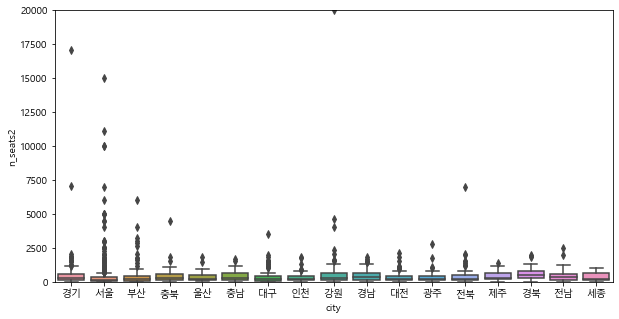

In [60]:
plt.figure(figsize=(10,5))
plt.ylim(0,20000)
sns.boxplot(x='city', y='n_seats2',data=seats)
plt.show()

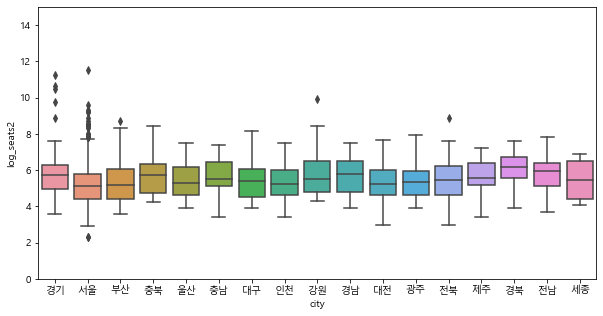

In [57]:
plt.figure(figsize=(10,5))
plt.ylim(0,15)
sns.boxplot(x='city', y='log_seats2',data=seats)
plt.show()

In [64]:
show = seats.pivot_table(index='city',values='total', aggfunc='sum')
show = show.reset_index()

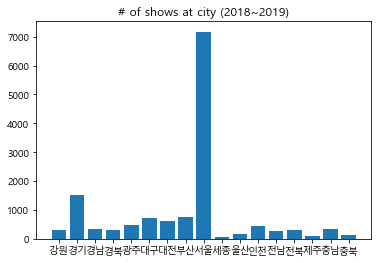

In [65]:
plt.bar(x=show.city, height=show.total)
plt.title('# of shows at city (2018~2019)')
plt.show()

In [71]:
show.city = ['kangwon','gyungki','kyungnam','kyungbuk','gwangju','daegu','daejeoun','busan',
             'seoul','sejong','ulsan','incheon','jeonnam','jeonbuk','jeju','chungnam','chungbuk']
show.head()

,city,total
0,kangwon,298.0
1,gyungki,1529.0
2,kyungnam,345.0
3,kyungbuk,287.0
4,gwangju,493.0


In [66]:
final1 = pd.read_csv('individual_ratio.csv')
final1.head()

,city,total,male,female,15~19,20~24,25~29,30~34,35~39,40~44,45~49,50~54,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop,count/pop
0,seoul,9930616,0.491086,0.508914,0.052050,0.067867,0.072537,0.077801,0.077878,0.076938,0.081557,0.073950,0.076928,0.060292,0.112058,0.123795,382960,725,0.038564,0.073007
1,busan,3498529,0.493238,0.506762,0.055149,0.067952,0.058427,0.061959,0.070925,0.071740,0.080558,0.079201,0.089809,0.072434,0.112682,0.149375,52572,107,0.015027,0.030584
2,daegu,2484557,0.496736,0.503264,0.063281,0.070085,0.057668,0.060374,0.070937,0.079231,0.089955,0.083999,0.082821,0.061903,0.127783,0.130210,37242,92,0.014989,0.037029
3,incheon,2943069,0.502085,0.497915,0.058033,0.066143,0.062796,0.069232,0.078980,0.080354,0.087218,0.083861,0.081697,0.054413,0.134968,0.107674,16828,49,0.005718,0.016649
4,gwangju,1469214,0.495596,0.504404,0.073180,0.078240,0.060470,0.067879,0.078424,0.084734,0.090159,0.078958,0.074999,0.051040,0.149016,0.118782,17281,50,0.011762,0.034032


In [73]:
final4 = pd.merge(final1, show, on='city')
final4.head()

,city,total_x,male,female,15~19,20~24,25~29,30~34,35~39,40~44,...,50~54,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop,count/pop,total_y
0,seoul,9930616,0.491086,0.508914,0.052050,0.067867,0.072537,0.077801,0.077878,0.076938,...,0.073950,0.076928,0.060292,0.112058,0.123795,382960,725,0.038564,0.073007,7171.0
1,busan,3498529,0.493238,0.506762,0.055149,0.067952,0.058427,0.061959,0.070925,0.071740,...,0.079201,0.089809,0.072434,0.112682,0.149375,52572,107,0.015027,0.030584,768.0
2,daegu,2484557,0.496736,0.503264,0.063281,0.070085,0.057668,0.060374,0.070937,0.079231,...,0.083999,0.082821,0.061903,0.127783,0.130210,37242,92,0.014989,0.037029,704.0
3,incheon,2943069,0.502085,0.497915,0.058033,0.066143,0.062796,0.069232,0.078980,0.080354,...,0.083861,0.081697,0.054413,0.134968,0.107674,16828,49,0.005718,0.016649,429.0
4,gwangju,1469214,0.495596,0.504404,0.073180,0.078240,0.060470,0.067879,0.078424,0.084734,...,0.078958,0.074999,0.051040,0.149016,0.118782,17281,50,0.011762,0.034032,493.0


In [75]:
final4['n_show/pop'] = final4['total_y']/final4['total_x'] *100
final4.head()

,city,total_x,male,female,15~19,20~24,25~29,30~34,35~39,40~44,...,55~59,60~64,under 15,over 65,n_seats2,count,seats/pop,count/pop,total_y,n_show/pop
0,seoul,9930616,0.491086,0.508914,0.052050,0.067867,0.072537,0.077801,0.077878,0.076938,...,0.076928,0.060292,0.112058,0.123795,382960,725,0.038564,0.073007,7171.0,0.072211
1,busan,3498529,0.493238,0.506762,0.055149,0.067952,0.058427,0.061959,0.070925,0.071740,...,0.089809,0.072434,0.112682,0.149375,52572,107,0.015027,0.030584,768.0,0.021952
2,daegu,2484557,0.496736,0.503264,0.063281,0.070085,0.057668,0.060374,0.070937,0.079231,...,0.082821,0.061903,0.127783,0.130210,37242,92,0.014989,0.037029,704.0,0.028335
3,incheon,2943069,0.502085,0.497915,0.058033,0.066143,0.062796,0.069232,0.078980,0.080354,...,0.081697,0.054413,0.134968,0.107674,16828,49,0.005718,0.016649,429.0,0.014577
4,gwangju,1469214,0.495596,0.504404,0.073180,0.078240,0.060470,0.067879,0.078424,0.084734,...,0.074999,0.051040,0.149016,0.118782,17281,50,0.011762,0.034032,493.0,0.033555


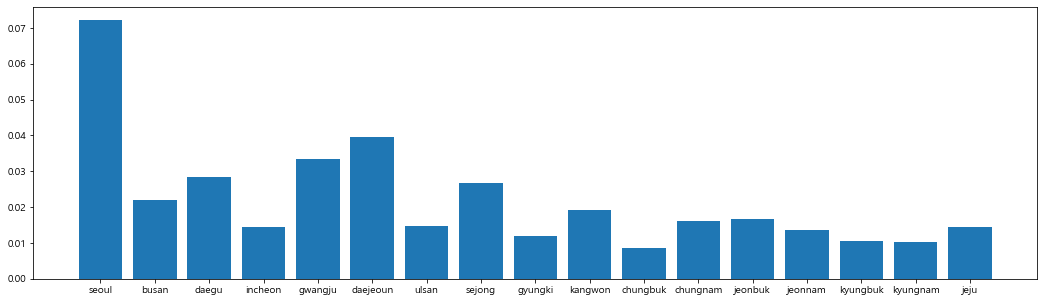

In [81]:
plt.figure(figsize=(18,5))
plt.bar(x='city', height='n_show/pop', data=final4)
plt.show()